# 서울시 범죄현황 데이터를 통한 CCTV 설치 필요지역 파악하기

## 1. 서울시 자치구별 범죄현황 데이터 읽어오기

In [74]:
import pandas as pd

Crime_kw = pd.read_csv('강원도 범죄현황 2023.csv', encoding= 'cp949')
Crime_kw


,연도,살인,강도,강간 강제추행,절도,폭력,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859
5,2018,25,16,699,4300,9054,14094
6,2017,32,27,627,5248,10253,16187
7,2016,28,28,603,5166,10853,16678


## 2. 데이터 살펴보기

### 2-1. 행x열 수, 열이름, 인덱스를 살펴보자

In [60]:
print(Crime_kw.shape)
print(Crime_kw.index)
print(Crime_kw.columns)

(8, 7)
RangeIndex(start=0, stop=8, step=1)
Index(['연도', '살인', '강도', '강간 강제추행', '절도', '폭력', '합계'], dtype='object')


### 2-2. 데이터의 상위 5행과 하위 5행을 살펴보자

In [62]:
Crime_kw.head(5)

,연도,살인,강도,강간 강제추행,절도,폭력,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859


In [64]:
Crime_kw.tail(5)

,연도,살인,강도,강간 강제추행,절도,폭력,합계
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859
5,2018,25,16,699,4300,9054,14094
6,2017,32,27,627,5248,10253,16187
7,2016,28,28,603,5166,10853,16678


### 2-3. 데이터의 타입, 아이템수, 누락데이터 수 등을 살펴보자

In [66]:
Crime_kw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   연도       8 non-null      int64
 1   살인       8 non-null      int64
 2   강도       8 non-null      int64
 3   강간 강제추행  8 non-null      int64
 4   절도       8 non-null      int64
 5   폭력       8 non-null      int64
 6   합계       8 non-null      int64
dtypes: int64(7)
memory usage: 580.0 bytes


## 3. CCTV 데이터 정리하기

### 3.1 데이터의 컬럼 이름을 변경해보자

In [68]:

Crime_kw.rename(columns={'살인' : '살인사건'}, inplace=True)
Crime_kw.rename(columns={'강도' : '강도사건'}, inplace=True)
Crime_kw.rename(columns={'강간 강제추행' : '강간 강제추행사건'}, inplace=True)
Crime_kw.rename(columns={'절도' : '절도사건'}, inplace=True)
Crime_kw.rename(columns={'폭력' : '폭력사건'}, inplace=True)


Crime_kw


,연도,살인사건,강도사건,강간 강제추행사건,절도사건,폭력사건,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859
5,2018,25,16,699,4300,9054,14094
6,2017,32,27,627,5248,10253,16187
7,2016,28,28,603,5166,10853,16678


### 3.2 불필요한 행과 열을 삭제하자

In [72]:
#'기간'열 삭제 (columns='기간', axis=1, inplace=True)
Crime_kw.drop(columns='연도', axis=1, inplace=True)

Crime_kw

,살인사건,강도사건,강간 강제추행사건,절도사건,폭력사건,합계
0,27,10,655,4364,7160,12216
1,26,19,722,4610,7268,12645
2,15,11,562,4194,7051,11833
3,35,21,585,4327,7806,12774
4,22,25,689,4675,8448,13859
5,25,16,699,4300,9054,14094
6,32,27,627,5248,10253,16187
7,28,28,603,5166,10853,16678


In [76]:
#0,1행 삭제 (index=[0,1], axis=0, inplace=True)
Crime_kw.drop(index=[6,7], axis=0, inplace=True)

Crime_kw

,연도,살인,강도,강간 강제추행,절도,폭력,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859
5,2018,25,16,699,4300,9054,14094


In [78]:
#기존 인덱스를 버리고 인덱스 0부터 다시 설정 (drop=True, inplace=True)  

Crime_kw.reset_index(drop=True, inplace=True)
Crime_kw

,연도,살인,강도,강간 강제추행,절도,폭력,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859
5,2018,25,16,699,4300,9054,14094


## 4. 범죄현황 데이터 자세히 보기

### 4-1. 범죄발생이 가장 많은/적은 상위 5개 구는 어디일까?

In [80]:
#'범죄발생'이 가장 많은 구, 데이터 '발생합계'열을 기준으로 내림차순 정렬하기

Crime_kw.sort_values(by='합계', ascending=False).head()

,연도,살인,강도,강간 강제추행,절도,폭력,합계
5,2018,25,16,699,4300,9054,14094
4,2019,22,25,689,4675,8448,13859
3,2020,35,21,585,4327,7806,12774
1,2022,26,19,722,4610,7268,12645
0,2023,27,10,655,4364,7160,12216


In [82]:
#범죄발생이 가장 적은 구, 데이터 '발생합계'열을 기준으로 오름차순 정렬하기

Crime_kw.sort_values(by='합계', ascending=True).head()

,연도,살인,강도,강간 강제추행,절도,폭력,합계
2,2021,15,11,562,4194,7051,11833
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859


### 4-2 각 범죄별 검거율을 계산하여 검거율 열을 추가하자

In [86]:
# 각 컬럼의 데이터 타입을 확인
# 검거율을 계산하기 위해서는 데이터가 정수형이거나 실수형이여야 함
# 이 정수형이 아니라 문자열 형임을 알수 있다. 문자열 형은 수학연산이 불가
Crime_kw.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   연도       6 non-null      int64
 1   살인       6 non-null      int64
 2   강도       6 non-null      int64
 3   강간 강제추행  6 non-null      int64
 4   절도       6 non-null      int64
 5   폭력       6 non-null      int64
 6   합계       6 non-null      int64
dtypes: int64(7)
memory usage: 468.0 bytes


In [90]:
#각 열의 문자열 형의 데이터를 정수형으로 변경
Crime_kw = Crime_kw.astype({'연도':'int64', '살인':'int64','강도':'int64', '강간 강제추행':'int64', '절도':'int64', '폭력':'int64', '합계':'int64'})
Crime_kw.head()

,연도,살인,강도,강간 강제추행,절도,폭력,합계
0,2023,27,10,655,4364,7160,12216
1,2022,26,19,722,4610,7268,12645
2,2021,15,11,562,4194,7051,11833
3,2020,35,21,585,4327,7806,12774
4,2019,22,25,689,4675,8448,13859


In [92]:
# 각 컬럼의 데이터 타입이 정수형으로 변경되었음 확인

Crime_kw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   연도       6 non-null      int64
 1   살인       6 non-null      int64
 2   강도       6 non-null      int64
 3   강간 강제추행  6 non-null      int64
 4   절도       6 non-null      int64
 5   폭력       6 non-null      int64
 6   합계       6 non-null      int64
dtypes: int64(7)
memory usage: 468.0 bytes


In [223]:
# #검거 수/발생 수 * 100
# #예시) Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
# #예시) Crime_Seoul['살인검거율'] = Crime_Seoul['살인검거']/ Crime_Seoul['살인']  * 100

# Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
# Crime_Seoul['살인검거율'] = Crime_Seoul['살인검거']/ Crime_Seoul['살인']  * 100
# Crime_Seoul['강도검거율'] = Crime_Seoul['강도검거']/ Crime_Seoul['강도']  * 100
# Crime_Seoul['강간강제추행검거율'] = Crime_Seoul['강간강제추행검거']/ Crime_Seoul['강간강제추행']  * 100
# Crime_Seoul['절도검거율'] = Crime_Seoul['절도검거']/ Crime_Seoul['절도']  * 100
# Crime_Seoul['폭력검거율'] = Crime_Seoul['폭력검거']/ Crime_Seoul['폭력']  * 100
                    
# Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159
1,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580
2,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990
4,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967


### 4-3. 각 범죄의 검거수를 삭제하자.

In [225]:
# #각 범죄의 검거 열은 삭제, 검거수는 검거율로 대체해 사용 
# #(columns=['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거'], axis=1, inplace=True)

# Crime_kw.drop(columns=['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거'], axis=1, inplace=True)

# Crime_kw

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310
3,성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990
4,광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967
5,동대문구,3692,2818,6,10,168,1531,1977,76.327194,100.000000,90.000000,85.119048,54.016982,92.716237
6,중랑구,4268,3138,10,4,138,1666,2450,73.523899,100.000000,125.000000,78.260870,54.501801,86.000000
7,성북구,2877,2323,3,3,176,1082,1613,80.743830,100.000000,100.000000,73.863636,67.560074,90.266584
8,강북구,3838,3023,6,3,176,1229,2424,78.764982,100.000000,66.666667,82.386364,54.027665,91.006601
9,도봉구,2110,1497,1,5,90,790,1224,70.947867,100.000000,100.000000,92.222222,49.873418,82.843137


### 4-4. 범죄의 검거율이 가장 높은/낮은 상위 5개구는 어디일까?

In [227]:
# #범죄 검거율이 가장 높은 구, 데이터 '검거율'열을 기준으로 정렬하기

# Crime_Seoul.sort_values(by='검거율', ascending=False).head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.0,114.285714,480.252101,70.561056,90.874159
7,성북구,2877,2323,3,3,176,1082,1613,80.743830,100.0,100.000000,73.863636,67.560074,90.266584
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.0,133.333333,87.132353,54.454454,89.538310
8,강북구,3838,3023,6,3,176,1229,2424,78.764982,100.0,66.666667,82.386364,54.027665,91.006601
11,은평구,3880,3000,3,1,194,1565,2117,77.319588,100.0,100.000000,83.505155,62.428115,87.718470


In [229]:
# #범죄 검거율이 가장 낮은 구, 데이터 '검거율'열을 기준으로 정렬하기

# Crime_Seoul.sort_values(by='검거율', ascending=True).head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
19,동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580
18,영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962
13,마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571
14,양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102


## 5. 인구수와 CCTV수 데이터와 범죄 현황 데이터 합치기

### 5-1 인구수와 CCTV 수 데이터 가져오기

In [94]:
# 서울시 자치구별 CCTV 현황 분석에서 정리하여 저장했던 'CCTV_pop.xlsx' 액셀 파일 열기

CCTV_pop = pd.read_csv('강원특별자치도교육청_학교CCTV현황_20240701.csv', encoding='cp949')
CCTV_pop

,시도교육청,지역명,학교급,학교명,CCTV대수
0,강원특별자치도,춘천,초,가산초등학교,16
1,강원특별자치도,춘천,초,광판초등학교,17
2,강원특별자치도,춘천,초,교대부설초등학교,21
3,강원특별자치도,춘천,초,교동초등학교,12
4,강원특별자치도,춘천,초,근화초등학교,8
...,...,...,...,...,...
652,강원특별자치도,고성,중,동광중학교,10
653,강원특별자치도,고성,고,거진정보고등학교,9
654,강원특별자치도,고성,고,고성고등학교,37
655,강원특별자치도,고성,고,대진고등학교,21


In [236]:
# CCTV_pop 데이터에서 '총계','인구수' 열만 가져와서 추가하기 
Crime_kw['CCTV수']=CCTV_pop['CCTV대수']
Crime_kw['인구수']=CCTV_pop['인구수']
Crime_kw.head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159,1729,151290
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580,2001,126171
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310,2383,228670
3,성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990,3515,300889
4,광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967,2556,351350


In [238]:
#구별로 인덱스 설정
Crime_Seoul.set_index('구별', inplace=True)
Crime_Seoul.head()

,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
구별,,,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159,1729,151290
중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580,2001,126171
용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310,2383,228670
성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990,3515,300889
광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967,2556,351350


## 5. 범죄 데이터 시각화 하기

In [240]:
#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import platform
path = "c:/windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~~~')    

'''
#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행
적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행
그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행

#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
'''

"\n#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행\n적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행\n그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행\n\n#한글 폰트 깨짐 방지 코드\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport matplotlib as mpl \nimport matplotlib.pyplot as plt \nimport matplotlib.font_manager as fm  \n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\npath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' \nfont_name = fm.FontProperties(fname=path, size=10).get_name()\nprint(font_name)\nplt.rc('font', family=font_name)\n\nfm._rebuild()\nmpl.rcParams['axes.unicode_minus'] = False\n"

### 5.1 범죄 발생수가 가장 많은 구는 어디인가?

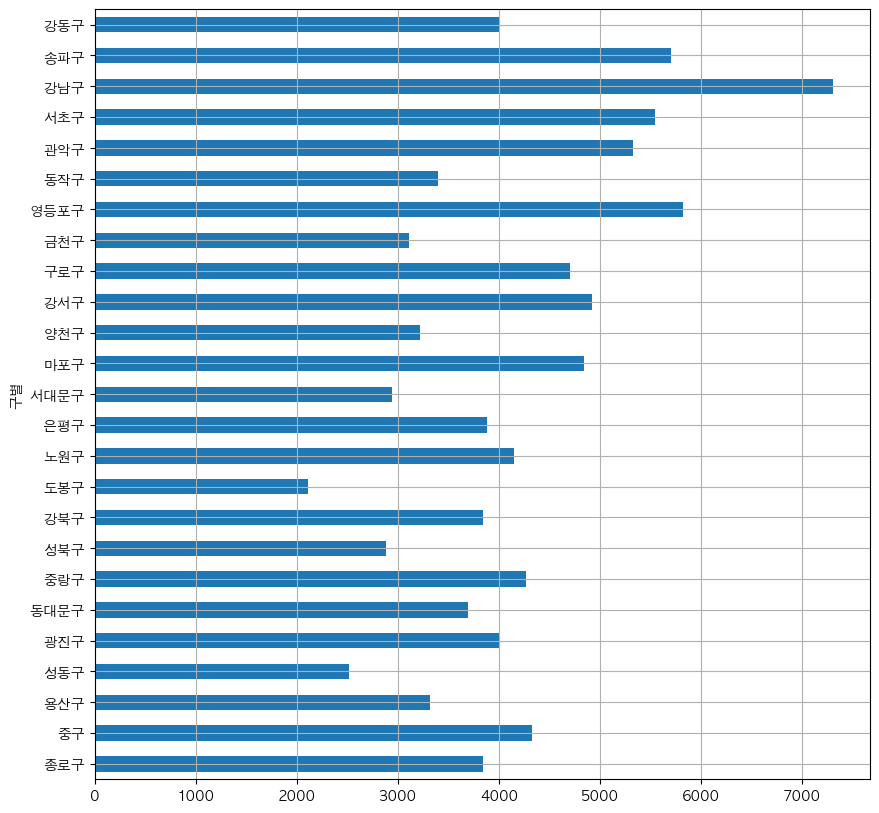

In [247]:
#막대 그래프 그리기
# '발생합계로 소팅하여 막대 그래프 그리기
Crime_Seoul['발생합계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 5.2 범죄 검거율이 가장 높은 구는 어디인가?

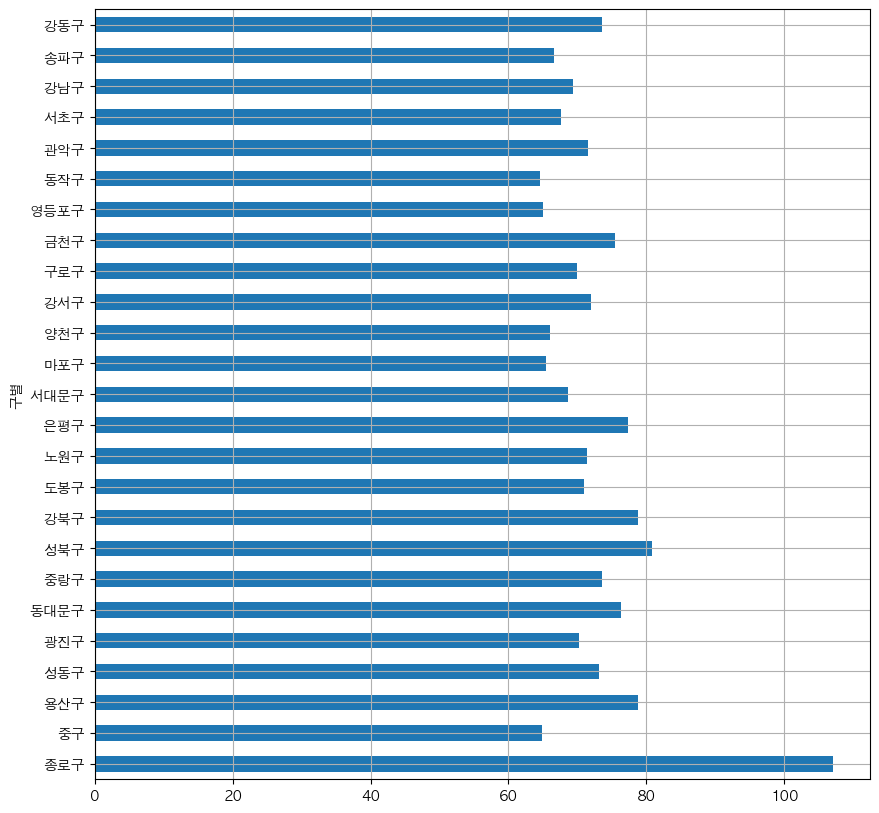

In [249]:
#막대 그래프 그리기
# '검거율'로 소팅하여 막대 그래프 그리기
Crime_Seoul['검거율'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 5.3 CCTV수가 가장 많은 구는 어디일까?

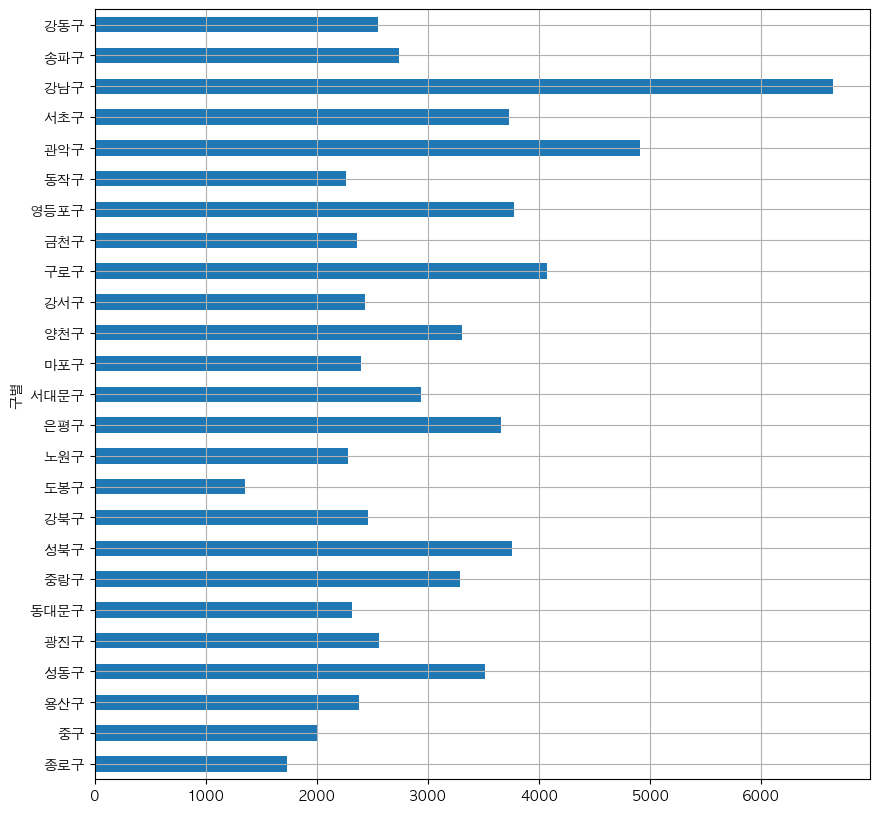

In [251]:
#막대 그래프 그리기
# 'CCTV수'로 소팅하여 막대 그래프 그리기
Crime_Seoul['CCTV수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### 5.4 강도, 살인, 폭력은 어떤 관계에 있을까?

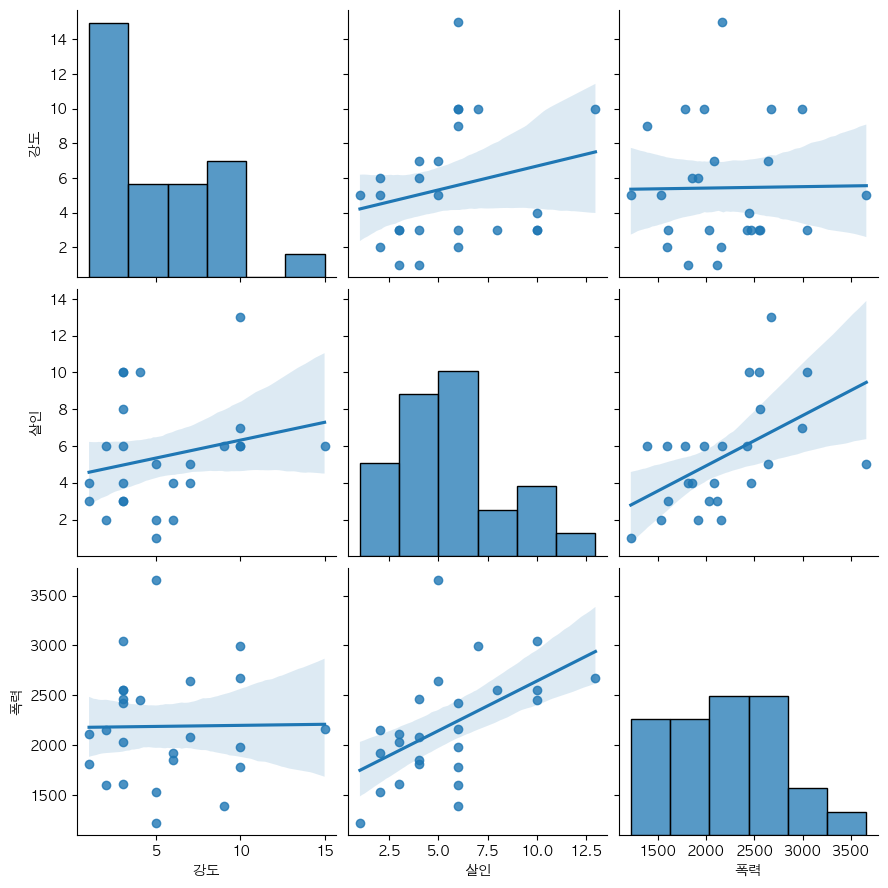

In [253]:
#강도, 살인, 폭력에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, vars=['강도','살인','폭력'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.5 살인, 강도와 인구수와 CCTV수와 어떤 관계에 있을까?

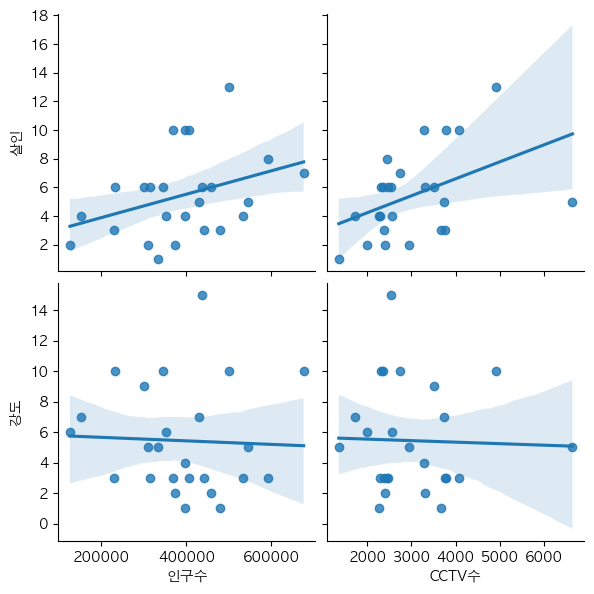

In [255]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인','강도'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.6 인구수와 CCTV수는 살인검거율과 폭력검거율과 어떤 관계에 있을까?

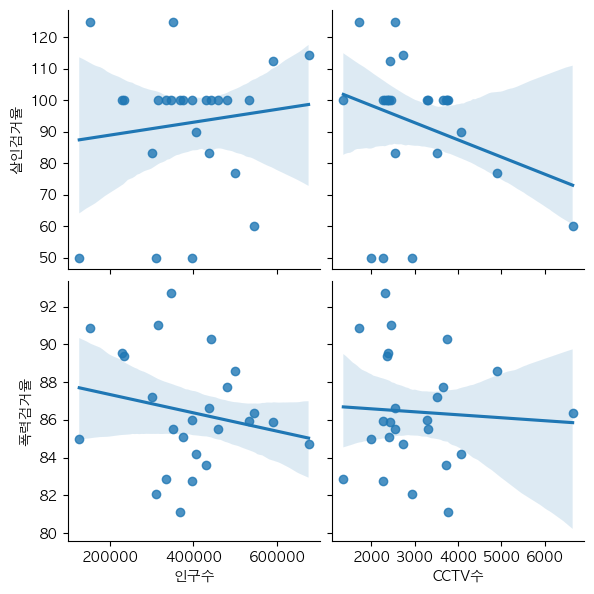

In [257]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인검거율','폭력검거율'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

In [259]:
Crime_Seoul.head()

,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
구별,,,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159,1729,151290
중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580,2001,126171
용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310,2383,228670
성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990,3515,300889
광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967,2556,351350


In [261]:
#범죄발생수, 검거율, CCTV수, 인구수 항목만 따로 가져오기 
df = Crime_Seoul[['발생합계','검거율','CCTV수','인구수']]
df.head()
#항목별 상관관계 살펴보기, 대각선을 중심으로 대칭, 음수는 두 데이터가 음의 상관관게, 양수는 양의 상간관계,
#절대값이 1에 가까울 수록 상관도가 높음
df.corr()

,발생합계,검거율,CCTV수,인구수
발생합계,1.000000,-0.257863,0.606156,0.490203
검거율,-0.257863,1.000000,-0.215796,-0.374106
CCTV수,0.606156,-0.215796,1.000000,0.441639
인구수,0.490203,-0.374106,0.441639,1.000000


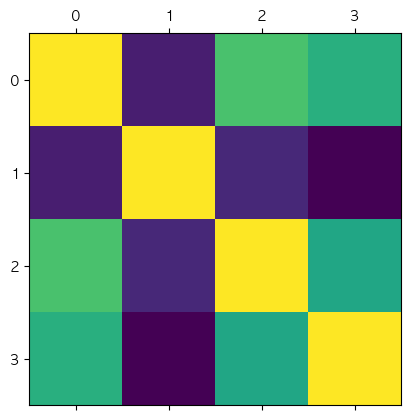

In [263]:
#상관관계 그래프로 보기, 양의 상관관계는 녹색계열, 음의 상관관계는 보라색 계열
plt.matshow(df.corr())

## 6. 위의 분석 결과를 보고 CCTV수가 범죄발생 및 검거에 미치는 영향과 CCTV 설치에 대한 자신의 생각을 아래에 정리해 보자

### 나의생각 :








